![alt text]( "OY Analytica")

# OY Analytica - An Open AI Community 
[github.com/oyanalytica](https://github.com/oyanalytica) 
<a href='https://twitter.com/oyanalytica'> </a>

In [89]:
import pandas as pd

In [90]:
data  = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [92]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [93]:
y=data[["Exited"]]


In [94]:
x=data[['CreditScore',  'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary',]]

In [95]:
geo=data['Geography']

In [96]:
geo=pd.get_dummies(geo, drop_first=True)
# geo

In [97]:
gender=data['Gender']

In [98]:
gender=pd.get_dummies(gender, drop_first=True)
# gender

In [99]:
x_final=pd.concat([x,gender,geo], axis=1)

In [100]:
x_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test= train_test_split(x_final,y,test_size=0.2 , random_state=42)

In [103]:
y_test.shape

(2000, 1)

In [104]:
from keras.models import Sequential

In [105]:
model= Sequential()

In [106]:
model.get_config()

{'name': 'sequential_2', 'layers': []}

In [107]:
from keras.layers import Dense

In [108]:
model.add(Dense(units=8, input_dim=11,activation='relu'))#,  bias_initializer='zeros', kernel_initializer='zeros'))

In [109]:
model.add(Dense(units=6, activation='relu',))#  bias_initializer='zeros', kernel_initializer='zeros'))

In [110]:
model.add(Dense(units=1,activation='sigmoid' , bias_initializer='zeros', kernel_initializer='zeros'))

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.get_layer("dense_8").get_weights()

[array([[ 0.08818156, -0.46625382,  0.2585103 , -0.09280425,  0.36445892,
          0.29790044],
        [ 0.20365822, -0.59475124,  0.10910976,  0.02882951, -0.46881637,
          0.36641955],
        [ 0.62124693, -0.19954175,  0.47859263,  0.17821616,  0.2759086 ,
         -0.2688994 ],
        [-0.23015183, -0.6066614 ,  0.13631934,  0.10886127,  0.33451796,
         -0.11430669],
        [-0.34943408, -0.06131262, -0.44063085,  0.42167115,  0.3372087 ,
         -0.50970024],
        [-0.28858536, -0.5833885 , -0.12453234,  0.49927044,  0.58060706,
          0.29617482],
        [-0.62702143, -0.49025232, -0.12047595, -0.43515676,  0.55812085,
          0.6250895 ],
        [ 0.5086682 , -0.43529877,  0.24686992,  0.14339405,  0.61430097,
         -0.23536512]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [70]:
from keras.optimizers import Adam
model.compile( loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [71]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 0.6611 - accuracy: 0.7957
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5794 - accuracy: 0.7813
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5341 - accuracy: 0.7921
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5237 - accuracy: 0.7874
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5122 - accuracy: 0.7930
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5083 - accuracy: 0.7948
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.8019
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4982 - accuracy: 0.8020
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5043 - accuracy: 0.7973
Epoch 10/50
250/250 [==============================] - ETA: 0s - loss: 0.5165 - accuracy: 0.78 - 1s 

In [73]:
model.get_weights()

[array([[-0.3328631 ,  0.0472412 , -0.24256445, -0.5195298 ,  0.28170377,
         -0.37661225, -0.17659056, -0.21358812],
        [ 0.08547783,  0.6710327 , -0.58125854,  0.5638477 ,  0.11330295,
         -0.869808  , -0.2675429 , -1.1669818 ],
        [ 0.54555136,  0.09404645,  0.58245105, -0.5390943 ,  0.22454098,
         -0.25848612, -0.12519266, -0.28044128],
        [-0.3182919 ,  0.31059283, -0.37370318, -0.0185655 ,  0.0390766 ,
          0.1423719 ,  0.06197482,  0.1112831 ],
        [ 0.11378664,  0.3094504 ,  0.98157424, -0.6599753 ,  0.53196317,
          0.7735515 , -0.22035335, -0.2519028 ],
        [-0.11964598, -0.40658596,  0.03438971,  0.23147047,  0.7588433 ,
          0.41517246,  0.29512647,  0.33624324],
        [ 0.54187804, -2.6754932 ,  2.0318384 , -2.4029112 ,  0.91148806,
          3.1545806 , -1.1322788 ,  2.5660572 ],
        [-0.15425   ,  0.16802843,  0.13420376,  0.36978245, -0.5794474 ,
          0.1589907 , -0.14562412,  0.36039242],
        [-0.4192

In [74]:
l=pd.DataFrame(model.history.history)

In [75]:
a= model.history.history['accuracy']

In [76]:
a1=pd.DataFrame(a)

In [77]:
type(a1)

pandas.core.frame.DataFrame

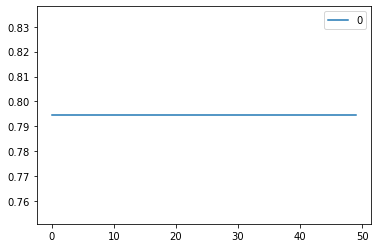

In [78]:
a1.plot()

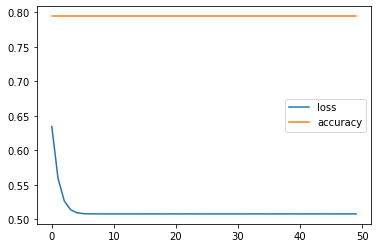

In [79]:
l.plot()

In [83]:
x_train.iloc[2].values

array([5.5900000e+02, 2.4000000e+01, 3.0000000e+00, 1.1473992e+05,
       1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 8.5891020e+04,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00])

In [82]:
model.predict([[6.9000000e+02, 2.9000000e+01, 5.0000000e+00, 0.0000000e+00,
       2.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0857797e+05,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

array([[0.20497552]], dtype=float32)

In [85]:
x_train.iloc[0].values

array([6.8600000e+02, 3.2000000e+01, 6.0000000e+00, 0.0000000e+00,
       2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.7909326e+05,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [88]:
model.predict(x_test)

array([[0.20497552],
       [0.20497552],
       [0.20497552],
       ...,
       [0.20497552],
       [0.20497552],
       [0.20497552]], dtype=float32)